In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


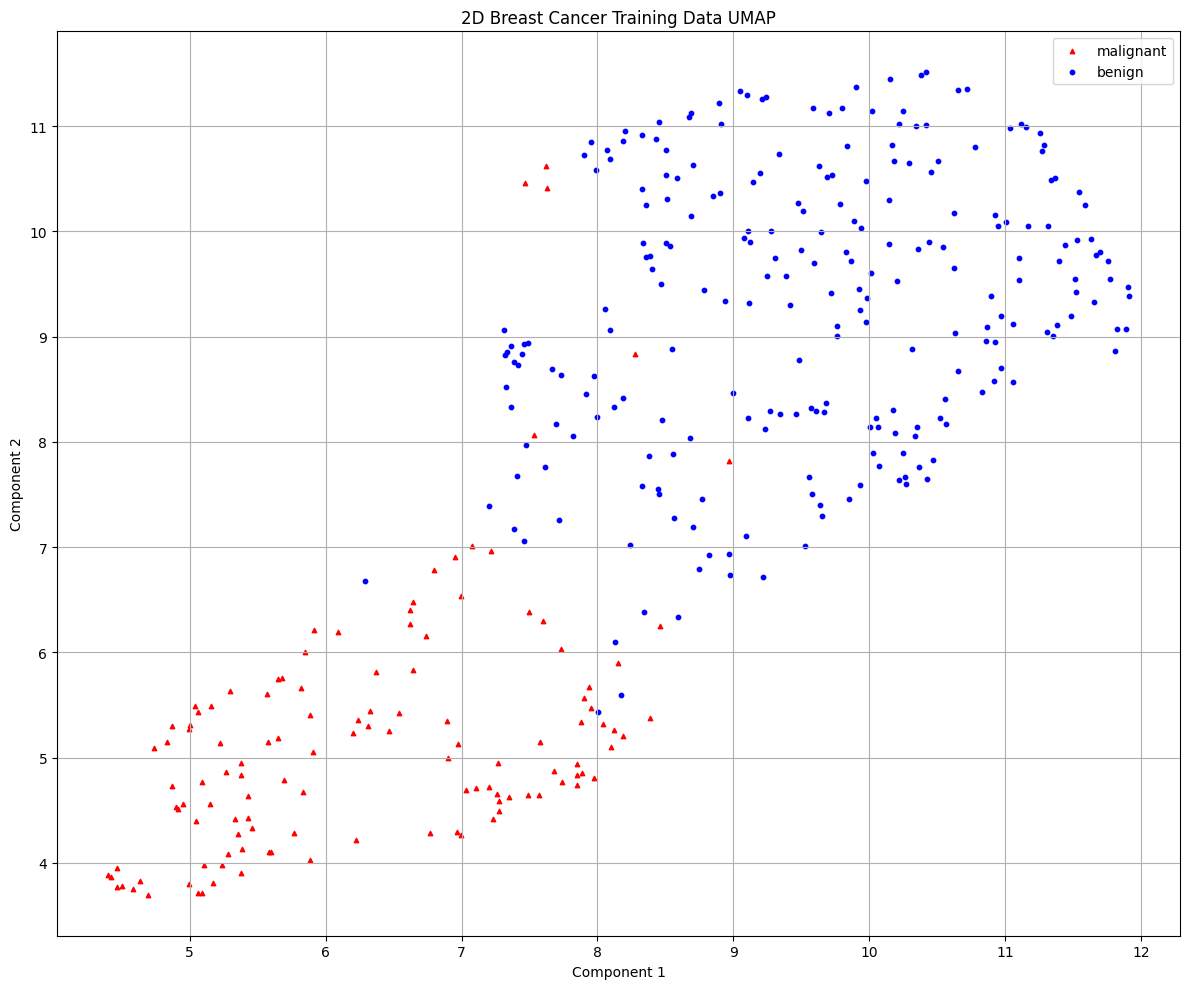

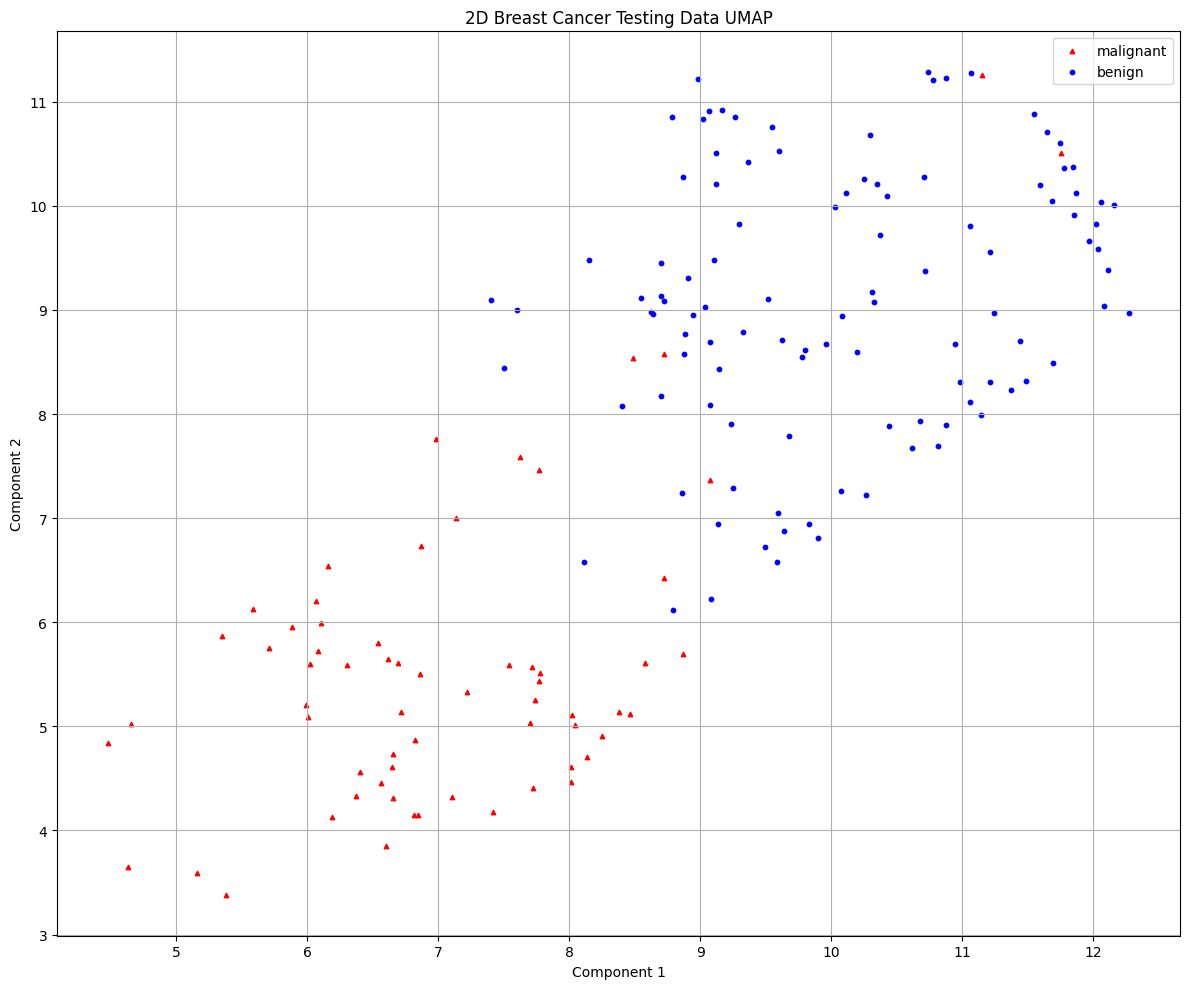

[I 2025-04-27 11:25:01,736] A new study created in memory with name: no-name-fd82b361-a480-4e63-95be-41a8c5d26c44
[I 2025-04-27 11:25:01,755] Trial 0 finished with value: 0.6658675799086758 and parameters: {'C': 6.913014937630327, 'kernel': 'sigmoid', 'gamma': 0.0060487574443864175, 'max_iter': 5876}. Best is trial 0 with value: 0.6658675799086758.
[I 2025-04-27 11:25:01,766] Trial 1 finished with value: 0.9613013698630137 and parameters: {'C': 0.5215955334302136, 'kernel': 'linear', 'max_iter': 2066}. Best is trial 1 with value: 0.9613013698630137.
[I 2025-04-27 11:25:01,786] Trial 2 finished with value: 0.6630136986301369 and parameters: {'C': 0.00340913809547844, 'kernel': 'sigmoid', 'gamma': 1.1747636224066302, 'max_iter': 1059}. Best is trial 1 with value: 0.9613013698630137.
[I 2025-04-27 11:25:01,813] Trial 3 finished with value: 0.6630136986301369 and parameters: {'C': 0.4268778852489364, 'kernel': 'rbf', 'gamma': 0.0003608065276155109, 'max_iter': 6963}. Best is trial 1 with v

Best trial:
Accuracy: 0.9724505327245054
Best hyperparameters:  {'C': 0.01599030390985556, 'kernel': 'linear', 'max_iter': 4610}


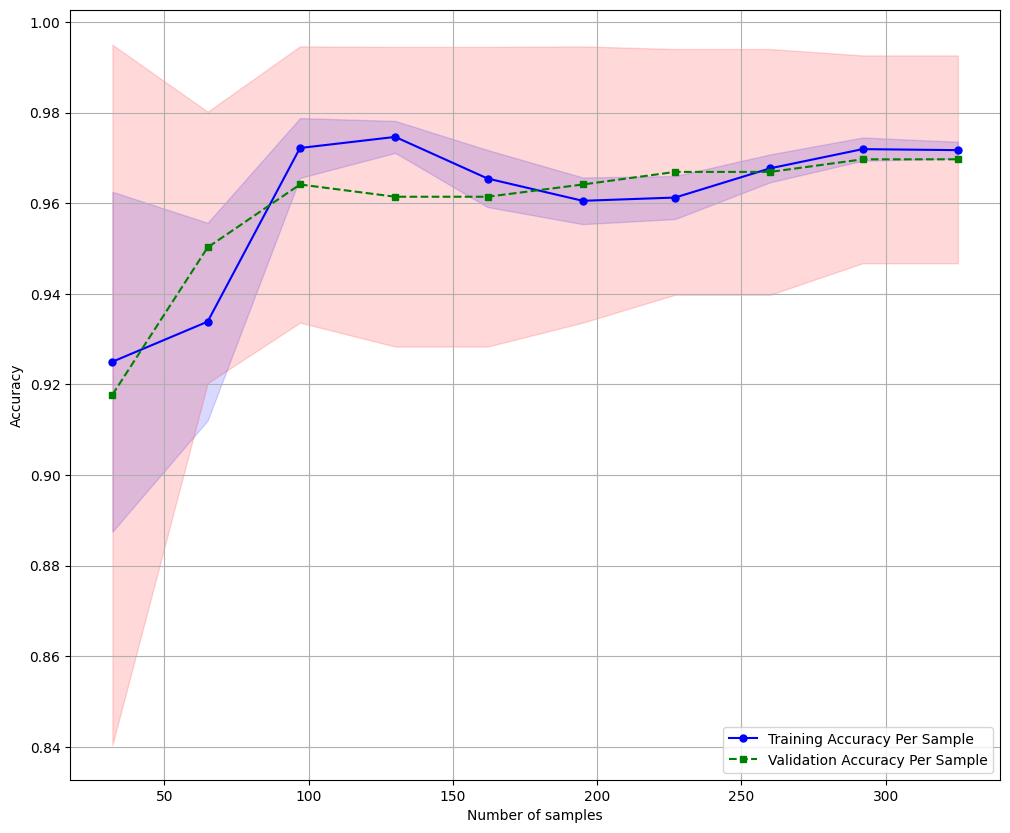

Confusion Matrix
[[ 55   9]
 [  0 107]]
Accuracy: 0.9474, Precision: 0.9224, Recall: 1.0000, F1: 0.9596, AUC: 0.9606


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)